# Plot different data

In [10]:
# import needed packages
import pandas as pd
import numpy as np
import os
import scipy
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#import ffmpeg
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import scipy.integrate as spi
#from scipy.integrate import odeint #this is the module to solve ODEs
%matplotlib inline

# set which simulation you want to plot

In [11]:
# select which data to run
#"simpleformat_26_1_M1" #with mass movement, varying inflow. 4 different D, 72h
#"simpleformat_26_1_M0" #without movement, varying inflow. 4 different D, 72h

#"simpleformat_27_1" #with mass movement, constant inflow and constant nutrient concentration in inflow. 4 different D, 72h

#simpleformat_26_1_SCFA #with mass movement, varying inflow. 4 different D, 72h - simulates SCFA secretion and uptake

#"simpleformat_28_1" #no mass movement, constant inflow and constant nutrient concentration in inflow. 4 different D, 72h

#"simpleformat_29_3" #WITH mass movement, varying inflow with varying nutrient concentrations. NO CECUM. 4 different D, 72h

#"simpleformat_29_4" #NO mass movement, varying inflow with varying nutrient concentrations. NO CECUM. 4 different D, 72h

#"simpleformat_30_1_M0" no mass movement, constant inflow constant nutrient concentration in inflow. NO CECUM. 4 different D, 72h
#"simpleformat_30_1_M1" mass movement constant inflow constant nutrient concentration in inflow. NO CECUM. 4 different D, 72h

#namerunlist=["26_5_SCFA","26_4_SCFA","26_3_SCFA"]#,"26_1_M0","30_1_M0","30_1_M1","27_1","28_1","29_3","29_4"]
#Dindexlist=[0]
#namerunlist=["26_1_M1","29_3"]
namerunlist2=["28_1","29_4","26_1_M0","26_1_M1"]

namerunlist=["26_1_M1","26_1_M0","30_1_M0","30_1_M1","27_1","28_1","29_3","29_4"]#,"26_1_M0","30_1_M0","30_1_M1","27_1","28_1","29_3","29_4"]
namerunlist=["26_1_M1"]#,"26_1_M0","30_1_M0","30_1_M1","27_1","28_1","29_3","29_4"]#,"26_1_M0","30_1_M0","30_1_M1","27_1","28_1","29_3","29_4"]

Dindexlist=[0,1,2,3]

#namerunlist=["26_3_SCFA","26_4_SCFA"] #can put several simulations here as list ,30_1_M0"
#Dindexlist=[0] #for SCFA, only one D value per simulation

#namerunlist=["30_1_M0","30_1_M1"]#,"27_1","28_1","29_3","29_4"]

#for plots where several timepoints are shown
timepoints=[10,20,30,40] #set timepoints to plot
colorlistdiffD=["r","b","g","m"]

#which variables should be shown
if ("26_3_SCFA" in namerunlist) or ("26_4_SCFA" in namerunlist) or ("26_5_SCFA" in namerunlist):
    varnames=["c2","c3","c4","u","w"]
    varnames_long=["nutrients (mM)","bacteria (OD)","SCFA (mM)","$v_{r}$","$v_{z}$"]
    varnames_flux=["nutrients (mol/s)","bacteria (g/s)","SCFA (mol)","$v_{r}$","$v_{z}$"]
    varnames_total=["nutrients (mol)","bacteria (g)","SCFA (mol)","$v_{r}$","$v_{z}$"]
    variables=["c2","c3","c4"]  
else:
    varnames=["c2","c3","u","w"]
    varnames_long=["nutrients (mM)","bacteria (OD)","$v_{r}$","$v_{z}$"]
    varnames_flux=["nutrients (mol/s)","bacteria (g/s)","$v_{r}$","$v_{z}$"]
    varnames_total=["nutrients (mol)","bacteria (g)","$v_{r}$","$v_{z}$"]
    variables=["c2","c3"]
    

colorvariables=["b","r","m","orange"]

#set in which folder output should be stored
foldername_outbase="plot_outputs"
if not os.path.exists(foldername_outbase):
               os.makedirs(foldername_outbase)        

#names of folders in which data is stored
foldername_data="data_simpleformat"
foldername_kymograph="data_kymographs"



In [12]:

#
#just to seperate M0 and M1 cases in total systesm ....
#namec="26_1_Qin"
#namec="26_1_Qout"
#namec="26_1Growth"
#namec="30_1_Influx_c2_c3"
#namec="30_1_Outflux_c2_c3"
#namec="30_1_Total_c2_c3"
#systemsvarfolder="data_fromcomsol/systems_variables/systems_variables_June2023"
#cur=pd.read_csv(os.path.join(systemsvarfolder,"_need_m0m1_seperatedly_Simulation"+namec+".txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
#display(cur)

#fM0 = open(os.path.join(systemsvarfolder,namec+"_M0.txt"), 'a')
#header = '%\n%\n%\n%\n%\n'
#fM0.write(header)
#curout=cur.loc[cur["M1"]==0].to_csv(fM0, sep=" ",index=False,header=False)
#fM0.close()

#fM1 = open(os.path.join(systemsvarfolder,namec+"_M1.txt"), 'a')
#fM1.write(header)
#curout=cur.loc[cur["M1"]==1].to_csv(fM1, sep=" ",index=False,header=False)
#fM1.close()
#display(curout)

In [13]:
# Plot inflow variation

['D', 'M1', 'time', 'c2', 'c3']


array([1.e-06, 1.e-07, 1.e-08, 1.e-09])

,D,M1,time,c2,c3
0,1.000000e-06,1,0.000000,-8.169935e-09,NaN
1,1.000000e-06,1,0.166667,-8.169935e-09,NaN
2,1.000000e-06,1,0.333333,-8.169935e-09,NaN
3,1.000000e-06,1,0.500000,-8.169935e-09,NaN
4,1.000000e-06,1,0.666667,-8.169935e-09,NaN
...,...,...,...,...,...
1727,1.000000e-09,1,71.333333,-8.169935e-09,NaN
1728,1.000000e-09,1,71.500000,-8.169935e-09,NaN
1729,1.000000e-09,1,71.666667,-8.169935e-09,NaN
1730,1.000000e-09,1,71.833333,-8.169935e-09,NaN


array([1.e-06, 1.e-07, 1.e-08, 1.e-09])

,D,M1,time,c2,c3
0,1.000000e-06,1,0.000000,-8.169935e-09,NaN
1,1.000000e-06,1,0.166667,-8.169935e-09,NaN
2,1.000000e-06,1,0.333333,-8.169935e-09,NaN
3,1.000000e-06,1,0.500000,-8.169935e-09,NaN
4,1.000000e-06,1,0.666667,-8.169935e-09,NaN
...,...,...,...,...,...
1727,1.000000e-09,1,71.333333,-8.169935e-09,NaN
1728,1.000000e-09,1,71.500000,-8.169935e-09,NaN
1729,1.000000e-09,1,71.666667,-8.169935e-09,NaN
1730,1.000000e-09,1,71.833333,-8.169935e-09,NaN


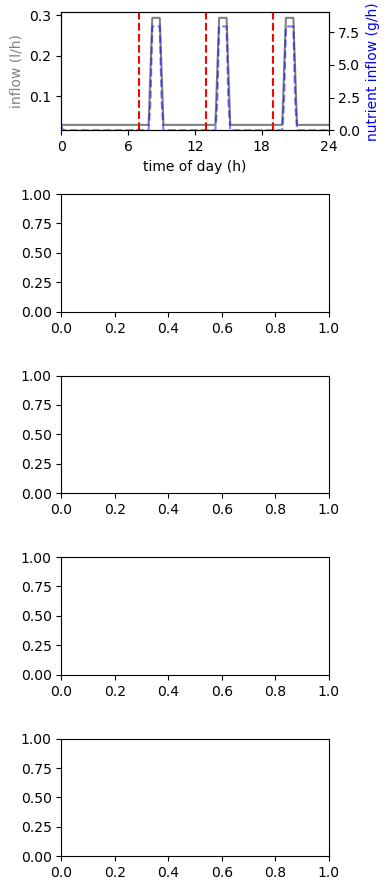

In [26]:

meal=[31-24,37-24,43-24]
systemsvarfolder="data_fromcomsol/systems_variables"
print(names)
influxc=pd.read_csv(os.path.join(systemsvarfolder,"26_1_M1_Qin.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
display(influx["D"].unique())
select3c=influxc.loc[influxc["D"]==1e-08]
display(influxc)


influxcNUT=pd.read_csv(os.path.join(systemsvarfolder,"26_1_M0_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
display(influx["D"].unique())
select3cNUT=influxcNUT.loc[influxcNUT["D"]==1e-08]
display(influxc)





fig2, ax2 = plt.subplots(5,1,figsize=(4,1.8*5)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
ax2[0].set_xlabel("time of day (h)")
#plot radius
#m^3/s to l/h
conversionflux=3600*1000
conversionnut=3600*180 #g/h

ax2[0].plot(select3c['time'],-1*conversionflux*select3c['c2'],ls='-',marker='',color='gray')
ax2tw=ax2[0].twinx()
ax2tw.plot(select3cNUT['time'],-1*conversionnut*select3cNUT['c2'],ls='--',marker='',color='b',alpha=0.5)
ax2tw.set_ylim(0,9)

#print(np.trapz(-1*conversionflux*select3c['c2'], x=select3c['time']))
ax2[0].set_ylabel("inflow (l/h)",color='gray')
ax2tw.set_ylabel("nutrient inflow (g/h)",color='blue')
#ax2[0,0].set_ylim(0,3.5)
#ax2[0,0].set_xlim(0,deltat)
ax2[0].set_xticks([0,6,12,18,24])
#ax2[0,0].set_xticklabels(xtickslabels)
for m in meal:
    ax2[0].axvline(m,ls='--',color='r')
        
ax2[0].set_xlim(0,24)    
fig2.tight_layout()
plt.show()
fig2.savefig("plot_outputs/influxvariation.pdf", dpi=150)
        
        
        

# Plot total system variables over time

e..g. total number of bacteria in gut

total system variables froma separate export from comsol


26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


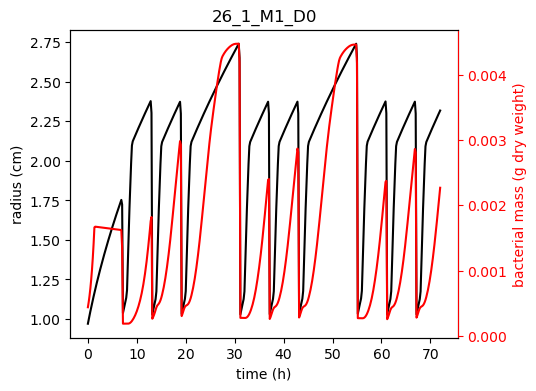

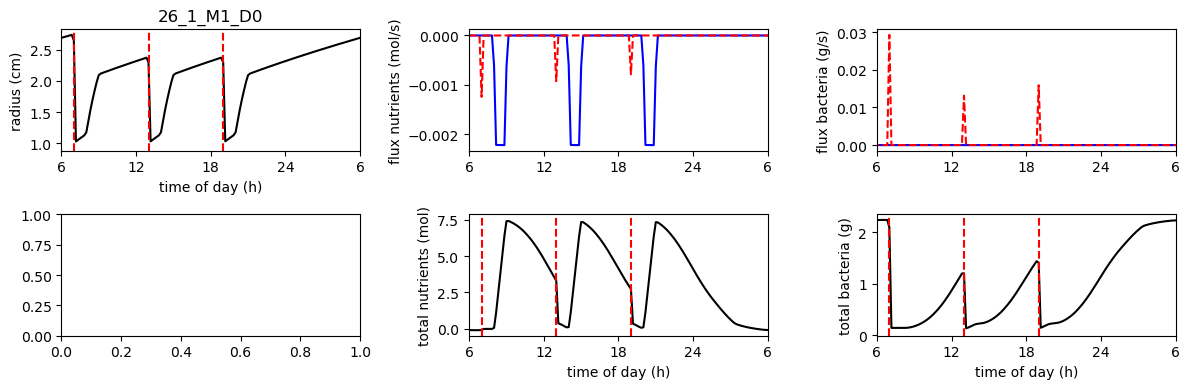

26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


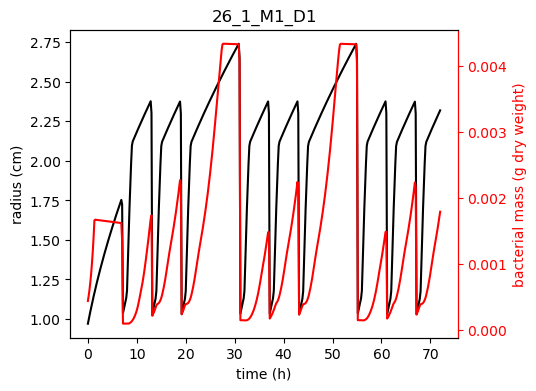

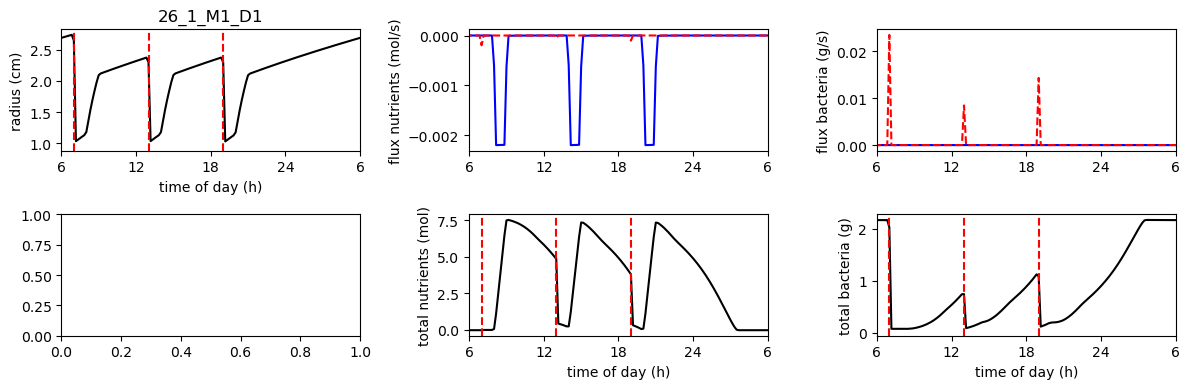

26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


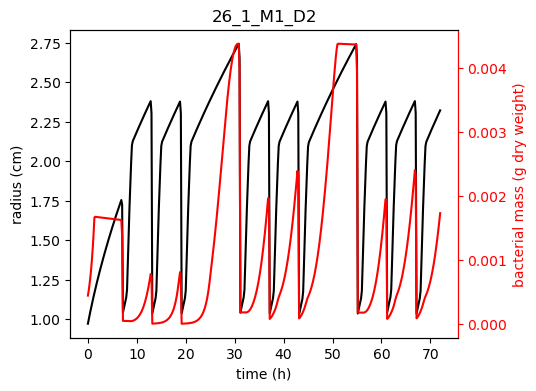

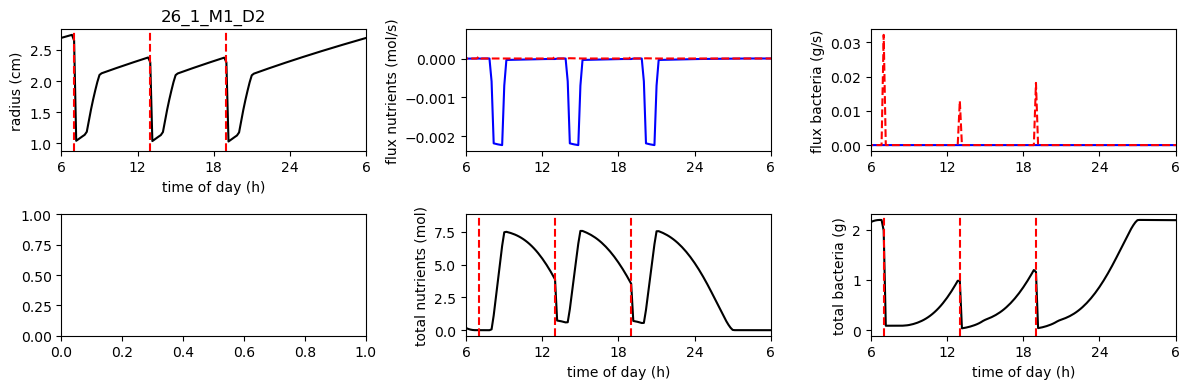

26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


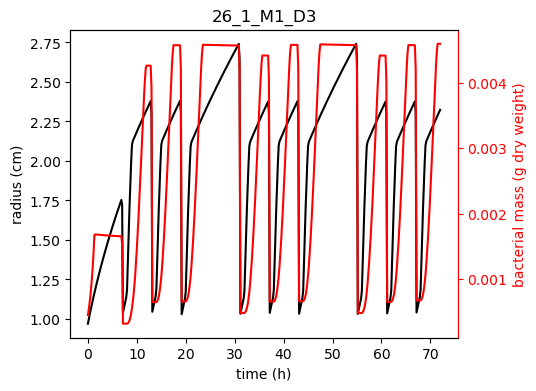

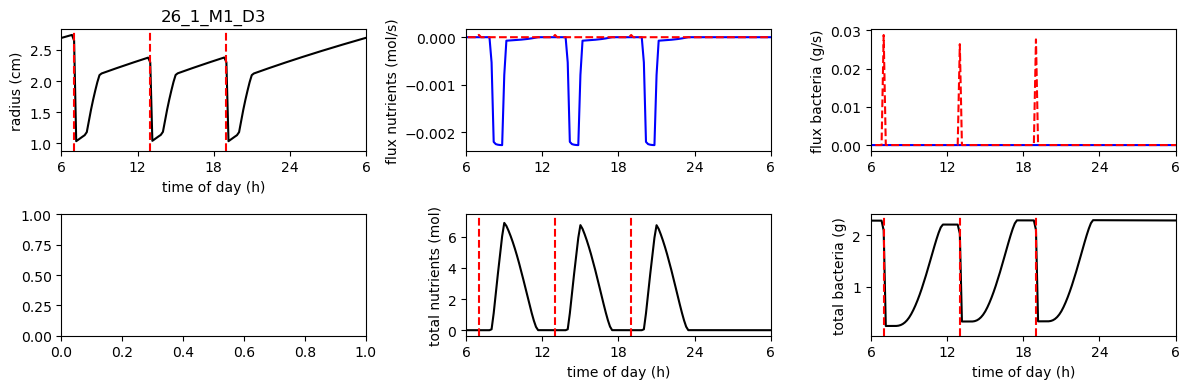

In [9]:
for name in namerunlist: #go through all different simulations
           
    for Dindex in Dindexlist:  #go through all diffusion values
        
        #load data
        
        name_withoutsimple=name
        print(name_withoutsimple)
        systemsvarfolder="data_fromcomsol/systems_variables"
        if "SCFA" in name:
            #fix later
            names=["D","M1","time","c2","c3","c4"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)    
            names_abs=["D","M1","time","c4"]
            absorption=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Absorption.txt"), delim_whitespace=True,skiprows=5,names=names_abs,index_col=False)
        elif name in ["29_4"]:   
            names=["D","time","c2","c3"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        else:       
            names=["D","M1","time","c2","c3"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        
        #if name in ["simpleformat_26_1_M1","simpleformat_26_1_M0"]:
        #    influx=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Influx_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    outflux=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Outflux_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    total=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Total_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)    
        
        
        display(influx.head(3))
        display(outflux.head(3))
        display(total.head(3))
        

        #load corresponding kymograph data
        picklename=name+"_D"+str(Dindex)+'calculateddata.pickle'
        with open(os.path.join("data_kymographs",picklename), 'rb') as handle:
            data_calculated = pickle.load(handle)
        D_unique=data_calculated["D_values"]
        
        #select right D and M1 value
        influx_select=influx.loc[(influx["D"]==D_unique[Dindex])]
        outflux_select=outflux.loc[(outflux["D"]==D_unique[Dindex])]
        total_select=total.loc[(total["D"]==D_unique[Dindex])]
        if "SCFA" in name:
                absorption_select=absorption.loc[(outflux["D"]==D_unique[Dindex])]
        
        #prepare foldername to store plots
        foldername=os.path.join(foldername_outbase,"systemvariables_over_time_"+name+"_D"+str(Dindex))
        foldername2=os.path.join(foldername_outbase,"systemvariables_over_time_diffpanels_"+name+"_D"+str(Dindex))
        
        
        fig, ax = plt.subplots(1,1,figsize=(5,4)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
        
        
        ###############
        #plot in one plot
        ################
        
        ax.set_title(name+"_D"+str(Dindex))
        ax.plot(data_calculated['time'],data_calculated['systemradius']*100,ls='-',marker='',color='k')
        axtw=ax.twinx()
        #conversion factor to go from OD m^3 unit (comosol) to bacterial dryweight is 500
        axtw.plot(outflux_select["time"],total_select["c3"],ls='-',marker='',color='r')
        axtw.set_ylabel("bacterial mass (g dry weight)",color='r')
        axtw.tick_params(axis='y', colors='red')    #setting up X-axis tick color to red
        axtw.spines['right'].set_color('red')        # setting up Y-axis tick color to red
        ax.set_xlabel("time (h)")
        ax.set_ylabel("radius (cm)")
        
        #ax.set_ylim(0,3.5)
        
        fig.savefig(foldername+".pdf", dpi=150)
        #plot in one plot
        
        
        ###
        if "26_5_" in name:
            tmin=24
            tmax=48
            xtickslabels=[0,6,12,18,24]
            xticks=[0,6,12,18,24]
        
        else:
            tmin=30
            tmax=54
            xtickslabels=[6,12,18,24,6]
            xticks=[0,6,12,18,24]
        meal=[31,37,43]
        
         
        deltat=tmax-tmin
        
        
        
        #######################
        
        #####plot ....all in one plot
        #plots on top of each other
        fig2, ax2 = plt.subplots(2,len(variables)+1,figsize=((1+len(variables))*4,2*2)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
        
        ax2[0,0].set_xlabel("time of day (h)")
        #plot radius
        ax2[0,0].set_title(name+"_D"+str(Dindex))
        ax2[0,0].plot(data_calculated['time']-tmin,data_calculated['systemradius']*100,ls='-',marker='',color='k')
        ax2[0,0].set_ylabel("radius (cm)")
        #ax2[0,0].set_ylim(0,3.5)
        ax2[0,0].set_xlim(0,deltat)
        ax2[0,0].set_xticks(xticks)
        ax2[0,0].set_xticklabels(xtickslabels)
        for m in meal:
                ax2[0,0].axvline(m-tmin,ls='--',color='r')
        #plot variables
        iV=-1
        
        colorabsorption="m"
        colortotal="k"
        coloroutflux="r"
        colorinflux="b"
        
        for v in variables:
            iV=iV+1
            #varnames_long=["nutrients (mM)","bacteria (OD)","$v_{r}$","$v_{z}$"]
            #variables=["r","c2","c3"]
            if v=="c3":
                conversion=500
            elif v=="c2":
                conversion=180
            else:
                conversion=1
            conversionc4=3600*1000
            
            if v=="c4":
                #ax2[0,iV+1].plot(influx_select["time"],influx_select[v]*conversion,ls='-',marker='',color=colorinflux)
                #ax2[0,iV+1].plot(outflux_select["time"]-tmin,outflux_select[v],ls='--',marker='',color=coloroutflux)
                pass
            else:
                ax2[0,iV+1].plot(influx_select["time"]-tmin,influx_select[v]*conversion,ls='-',marker='',color=colorinflux)
                ax2[0,iV+1].plot(outflux_select["time"]-tmin,outflux_select[v]*conversion,ls='--',marker='',color=coloroutflux)
            
            ax2[0,iV+1].set_ylabel("flux "+varnames_flux[iV])
            if v=="c4":
                ax2[0,iV+1].set_ylabel("absorption SCFA (mmol/h)")
                #ax2[1,iV+1].set_yscale("log")
                pass
            ax2[1,iV+1].plot(total_select["time"]-tmin,total_select[v]*conversion,ls='-',marker='',color=colortotal)
            ax2[1,iV+1].set_ylabel("total "+varnames_total[iV])
            
            if v=="c4":
                ax2[0,iV+1].plot(absorption_select["time"]-tmin,absorption_select[v]*conversionc4,ls='-',marker='',color=colorabsorption)
                ax2[0,iV+1].set_ylim(0,max(absorption_select[v]*conversionc4))
                
            ax2[0,iV+1].set_xlim(0,deltat)
            ax2[1,iV+1].set_xlim(0,deltat)
            ax2[0,iV+1].set_xticks(xticks)
            ax2[0,iV+1].set_xticklabels(xtickslabels)
            ax2[1,iV+1].set_xticks(xticks)
            ax2[1,iV+1].set_xticklabels(xtickslabels)
            
            
            
            ax2[1,iV+1].set_xlabel("time of day (h)")
            
            
            for m in meal:
                ax2[1,iV+1].axvline(m-tmin,ls='--',color='r')
                if v=="c4":
                    ax2[0,iV+1].axvline(m-tmin,ls='--',color='r')
            
        #time label
        #ax2[1,len(variables)-1].set_xlabel("time (h)")
        
        
        
        fig2.tight_layout()
        plt.show()
        fig2.savefig(foldername2+".pdf", dpi=150)
        
        
        

26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


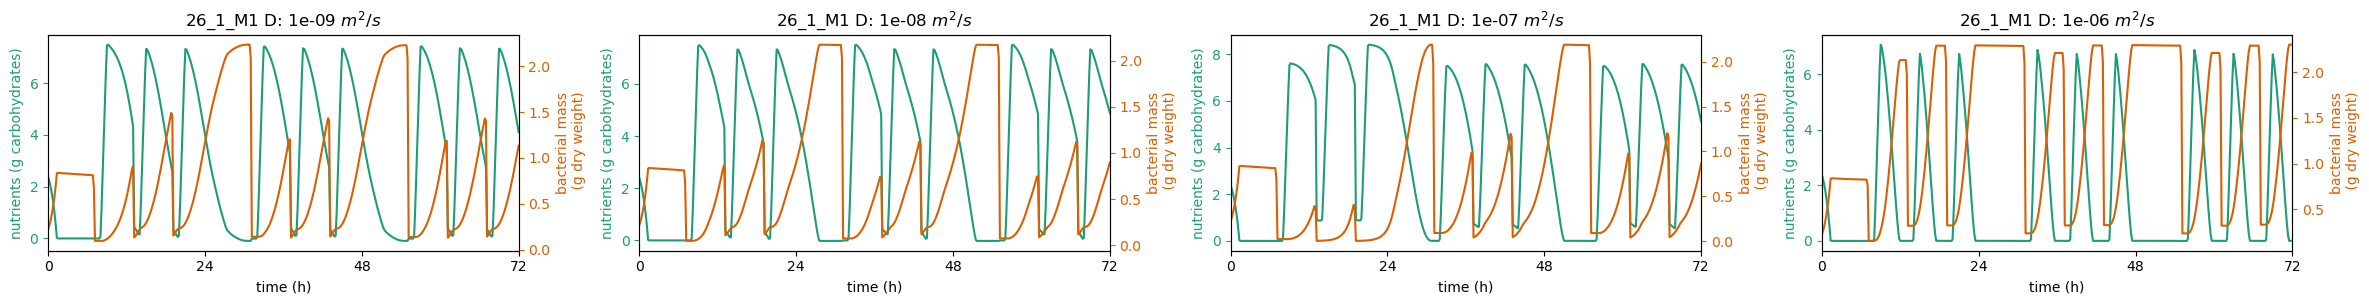

In [17]:
# Plot total bacterial and nutrient mass in one plot
for name in namerunlist: #go through all different simulations
    #fig4, ax4 = plt.subplots(1,4,figsize=(12,2.5))
    fig4, ax4 = plt.subplots(1,4,figsize=(23.8,3.14))
    ax4tw=[]
    for Dindex in Dindexlist:  #go through all diffusion values
        #load data
        ax4tw.append(ax4[Dindex].twinx())
        name_withoutsimple=name
        print(name_withoutsimple)
        systemsvarfolder="data_fromcomsol/systems_variables"
        if "SCFA" in name:
            #fix later
            names=["D","M1","time","c2","c3","c4"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)    
            names_abs=["D","M1","time","c4"]
            absorption=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Absorption.txt"), delim_whitespace=True,skiprows=5,names=names_abs,index_col=False)
        elif name in ["29_4"]:   
            names=["D","time","c2","c3"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        else:       
            names=["D","M1","time","c2","c3"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        
        #if name in ["simpleformat_26_1_M1","simpleformat_26_1_M0"]:
        #    influx=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Influx_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    outflux=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Outflux_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    total=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Total_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)    
        
        
        display(influx.head(3))
        display(outflux.head(3))
        display(total.head(3))
        

        #load corresponding kymograph data
        picklename=name+"_D"+str(Dindex)+'calculateddata.pickle'
        with open(os.path.join("data_kymographs",picklename), 'rb') as handle:
            data_calculated = pickle.load(handle)
        D_unique=data_calculated["D_values"]
        
        #select right D and M1 value
        influx_select=influx.loc[(influx["D"]==D_unique[Dindex])]
        outflux_select=outflux.loc[(outflux["D"]==D_unique[Dindex])]
        total_select=total.loc[(total["D"]==D_unique[Dindex])]
        if "SCFA" in name:
                absorption_select=absorption.loc[(outflux["D"]==D_unique[Dindex])]
        
        #prepare foldername to store plots
        foldername=os.path.join(foldername_outbase,"systemvariables_over_time_"+name+"_D"+str(Dindex))
        foldername2=os.path.join(foldername_outbase,"systemvariables_over_time_diffpanels_"+name+"_D"+str(Dindex))
        
######################################################
        
        colorn="#1b9e77"
        colorb="#d95f02"
        
        deltatminus=0 #or 48 if only last 24 should be shown
        tmaxrange=72 #or 24 if only last 24 should be shown
        ax4[Dindex].plot(total_select["time"]-deltatminus,180*total_select["c2"],color=colorn)
        ax4tw[Dindex].plot(total_select["time"]-deltatminus,0.5*1000*total_select["c3"],color=colorb)
        ax4[Dindex].set_xlabel("time (h)")
        ax4[Dindex].set_ylabel("nutrients (g carbohydrates)",color=colorn)
        ax4tw[Dindex].set_ylabel("bacterial mass\n (g dry weight)",color=colorb)
        ax4[Dindex].set_title(name+ " D: "+str(D_unique[Dindex])+" $m^2/s$")
        ax4[Dindex].set_xlim(0,tmaxrange)
        
        if tmaxrange==72:
            ax4[Dindex].set_xticks([0,24,48,72])
        else:
            ax4[Dindex].set_xticks([0,6,12,18,24])
        
        ax4[Dindex].spines['left'].set_color(colorn)
        ax4[Dindex].spines['right'].set_color(colorb)
        ax4[Dindex].yaxis.label.set_color(colorn)
        ax4[Dindex].tick_params(axis='y', colors=colorn)
        
        ax4tw[Dindex].yaxis.label.set_color(colorb)
        ax4tw[Dindex].tick_params(axis='y', colors=colorb)
        
                
    foldername=os.path.join(foldername_outbase,"bacterial_mass_and_nutrients_"+name+"_D"+str(Dindex))
    #fig3.savefig(os.path.join(foldername_outbase,"diffgr_trends.pdf"), dpi=150)
    fig4.tight_layout()
    fig4.savefig(os.path.join(foldername_outbase,"diffgr_multiple_panesl"+name+".pdf"), dpi=150)
    
        
        
        

In [18]:
#plot bacterial abundance -different runs

28_1


,D,M1,time,c2,c3
0,0.000001,0,0.000000,-0.000003,-2.406520e-08
1,0.000001,0,0.166667,-0.000003,-1.040227e-08
2,0.000001,0,0.333333,-0.000003,-6.230493e-09


,D,M1,time,c2,c3
0,0.000001,0,0.000000,0.000003,8.704810e-08
1,0.000001,0,0.166667,0.000002,1.024229e-07
2,0.000001,0,0.333333,0.000002,1.209239e-07


,D,M1,time,c2,c3
0,0.000001,0,0.000000,0.013286,0.000443
1,0.000001,0,0.166667,0.012538,0.000462
2,0.000001,0,0.333333,0.011874,0.000474


29_4


,D,time,c2,c3
0,0.000001,0.000000,2.235286e-07,7.460967e-09
1,0.000001,0.166667,-1.176856e-08,-4.963137e-10
2,0.000001,0.333333,-9.010643e-09,-4.886339e-10


,D,time,c2,c3
0,0.000001,0.000000,0.000001,4.096860e-08
1,0.000001,0.166667,0.000001,4.827164e-08
2,0.000001,0.333333,0.000001,5.697718e-08


,D,time,c2,c3
0,0.000001,0.000000,0.013254,0.000443
1,0.000001,0.166667,0.011716,0.000494
2,0.000001,0.333333,0.010135,0.000550


26_1_M0


,D,M1,time,c2,c3
0,0.000001,0,0.000000,-3.684644e-07,-1.230423e-08
1,0.000001,0,0.166667,-2.071117e-07,-8.733506e-09
2,0.000001,0,0.333333,-1.437067e-07,-7.791714e-09


,D,M1,time,c2,c3
0,0.000001,0,0.000000,0.000001,4.097992e-08
1,0.000001,0,0.166667,0.000001,4.828104e-08
2,0.000001,0,0.333333,0.000001,5.698866e-08


,D,M1,time,c2,c3
0,0.000001,0,0.000000,0.013254,0.000443
1,0.000001,0,0.166667,0.011716,0.000494
2,0.000001,0,0.333333,0.010135,0.000550


26_1_M1


,D,M1,time,c2,c3
0,0.000001,1,0.000000,-3.676946e-07,-1.227861e-08
1,0.000001,1,0.166667,-2.117621e-07,-8.929645e-09
2,0.000001,1,0.333333,-1.538475e-07,-8.341626e-09


,D,M1,time,c2,c3
0,0.000001,1,0.000000,2.068887e-08,6.992804e-10
1,0.000001,1,0.166667,1.922798e-08,8.095627e-10
2,0.000001,1,0.333333,1.768668e-08,9.572126e-10


,D,M1,time,c2,c3
0,0.000001,1,0.000000,0.013260,0.000443
1,0.000001,1,0.166667,0.012403,0.000523
2,0.000001,1,0.333333,0.011389,0.000618


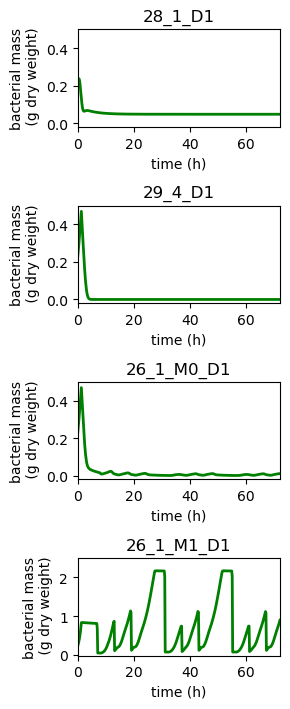

In [19]:

fig, ax = plt.subplots(len(namerunlist2),1,figsize=(3,1.8*len(namerunlist2))) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
Dindexlist2=[1]
nc=-1
for name in namerunlist2: #go through all different simulations
    nc=nc+1     
    for Dindex in Dindexlist2:  #go through all diffusion values
        #load data
        name_withoutsimple=name
        print(name_withoutsimple)
        systemsvarfolder="data_fromcomsol/systems_variables"
        if "SCFA" in name:
            #fix later
            names=["D","M1","time","c2","c3","c4"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3_c4.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)    
            names_abs=["D","M1","time","c4"]
            absorption=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Absorption.txt"), delim_whitespace=True,skiprows=5,names=names_abs,index_col=False)
        elif name in ["29_4"]:   
            names=["D","time","c2","c3"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        else:       
            names=["D","M1","time","c2","c3"]
            influx=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Influx_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            outflux=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Outflux_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
            total=pd.read_csv(os.path.join(systemsvarfolder,name_withoutsimple+"_Total_c2_c3.txt"), delim_whitespace=True,skiprows=5,names=names,index_col=False)
        
        #if name in ["simpleformat_26_1_M1","simpleformat_26_1_M0"]:
        #    influx=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Influx_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    outflux=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Outflux_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)
        #    total=pd.read_csv("data_fromcomsol/systems_variables_June2023/Simulation"+name_withoutsimple+"Total_c2_c3.txt", delim_whitespace=True,skiprows=5,names=names,index_col=False)    
        
        
        display(influx.head(3))
        display(outflux.head(3))
        display(total.head(3))
        

        #load corresponding kymograph data
        picklename=name+"_D"+str(Dindex)+'calculateddata.pickle'
        with open(os.path.join("data_kymographs",picklename), 'rb') as handle:
            data_calculated = pickle.load(handle)
        D_unique=data_calculated["D_values"]
        
        #select right D and M1 value
        influx_select=influx.loc[(influx["D"]==D_unique[Dindex])]
        outflux_select=outflux.loc[(outflux["D"]==D_unique[Dindex])]
        total_select=total.loc[(total["D"]==D_unique[Dindex])]
        if "SCFA" in name:
                absorption_select=absorption.loc[(outflux["D"]==D_unique[Dindex])]
        
        #prepare foldername to store plots
        foldername=os.path.join(foldername_outbase,"systemvariables_over_time_"+name+"_D"+str(Dindex))
        foldername2=os.path.join(foldername_outbase,"systemvariables_over_time_diffpanels_"+name+"_D"+str(Dindex))
        
        
        
        
        ###############
        #plot in one plot
        ################
        
        ax[nc].set_title(name+"_D"+str(Dindex))
        #ax.plot(data_calculated['time'],data_calculated['systemradius']*100,ls='-',marker='',color='k')
        #axtw=ax.twinx()
        #conversion factor to go from OD m^3 unit (comosol) to bacterial dryweight is 500
        ax[nc].plot(outflux_select["time"],0.5*1000*total_select["c3"],ls='-',marker='',c="g",lw=2)
        ax[nc].set_ylabel("bacterial mass\n (g dry weight)")
        ax[nc].set_xlabel("time (h)")
        
        bacmax=2.5
        if nc<3:
            ax[nc].set_ylim(-0.02,0.5)
        else:
            ax[nc].set_ylim(-0.02,bacmax)
        ax[nc].set_xlim(0,72)
        #ax.set_ylim(0,3.5)
        
fig.savefig(foldername+".pdf", dpi=150)
fig.tight_layout()
#plot in one plot
        

# Plot variables over space (for different timepoints)

26_1_M1
[10.0, 20.0, 30.0, 40.0]
[10.0, 20.0, 30.0, 40.0]
[10.0, 20.0, 30.0, 40.0]
[10.0, 20.0, 30.0, 40.0]


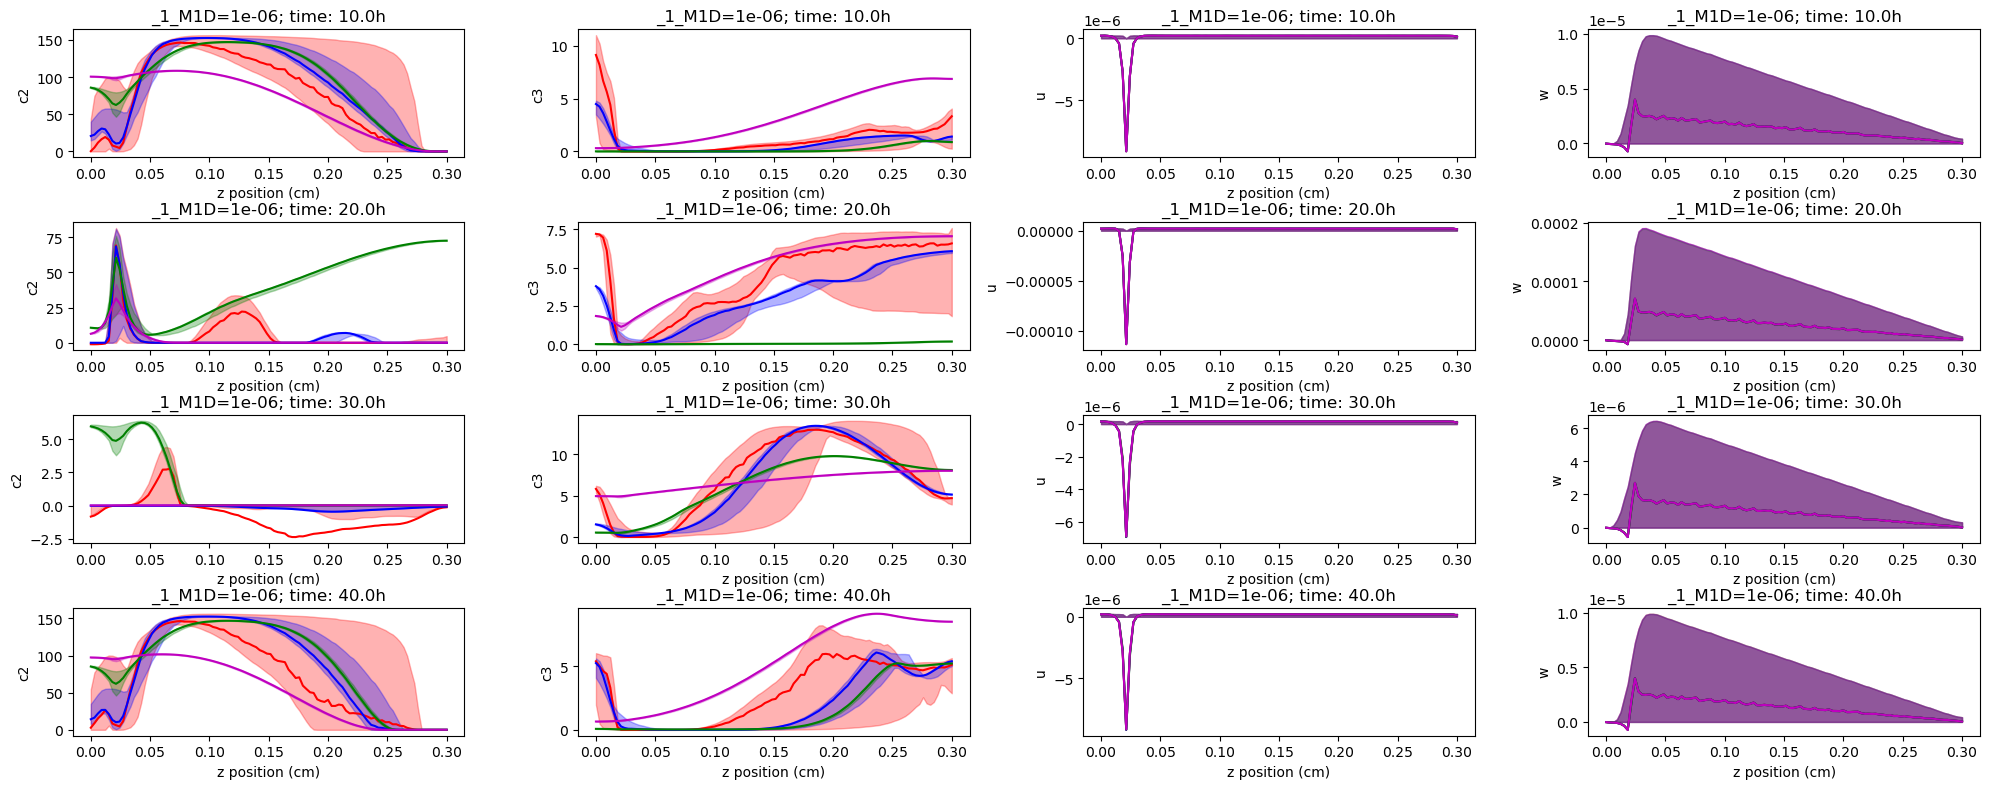

In [20]:
#mode="linear" #"linear, log"

#load corresponding kymograph data


for name in namerunlist: #go through all different simulations
        print(name)
        shortname=name[-5:]
        
        fig, ax = plt.subplots(len(timepoints),len(varnames),figsize=(20,8)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
            
        for Dindex in Dindexlist: #go through all diffusion values
        
            colorc=colorlistdiffD[Dindex]
            runname=shortname+"D="+str(D_unique[Dindex])
            
            #load corresponding kymograph data
            picklename=name+"_D"+str(Dindex)+'calculateddata.pickle'
            with open(os.path.join("data_kymographs",picklename), 'rb') as handle:
                data_calculated = pickle.load(handle)
        
            #prepare foldername to store plots
            foldername=os.path.join(foldername_outbase,"varaible_vs_z_different_timepoints"+name+"_D"+str(Dindex))
            
            
            #select for which timepoints to plot
            
            timepoints_corrected=timepoints
            timepoints_index=[0]*len(timepoints)
            #find closes timepoints for which data is available
            tc=-1
            for t in timepoints:
                tc=tc+1
                idx = (np.abs(data_calculated["time"] - t)).argmin()
                timepoints_corrected[tc]=data_calculated["time"][idx]
                timepoints_index[tc]=list(data_calculated["time"]).index(timepoints_corrected[tc])
            print(timepoints)
            
            tcount = -1
            for t_cur in timepoints: #t_unique[-1]
                tcount=tcount+1
                timeind=timepoints_index[tcount]
                

                #plot for every variable
                for iV in range(0,len(varnames)):
                        
                        ax[tcount,iV].set_title(runname+"; time: "+str(t_cur)+"h")
                        ax[tcount,iV].set_ylabel(varnames[iV])
                        ax[tcount,iV].set_xlabel("z position (cm)")
                        ax[tcount,iV].plot(data_calculated["z"],data_calculated["kymo_radav_"+varnames[iV]][timeind,:],color=colorc)
                        ax[tcount,iV].fill_between(data_calculated["z"],data_calculated["minradial_"+varnames[iV]][timeind,:],data_calculated["maxradial_"+varnames[iV]][timeind,:],alpha=0.3,color=colorc)
                                     
                        #ax[1,iV].set_ylim(0,25)
                        #axColor.yaxis.set_label_position('left')
                        #axColor.yaxis.set_ticks_position('left')


                #plt.show()

        

                    #fig.colorbar(im, ax=ax[1,iV])
                #fig.tight_layout()
        plt.tight_layout(h_pad=0.1)
            #timefilename=str(tcount).zfill(3)+".png"

        fig.savefig(foldername+".pdf", dpi=150)
        plt.show()

# Plot variables over space (average over last 24 hours)

[0, 1, 2, 3]


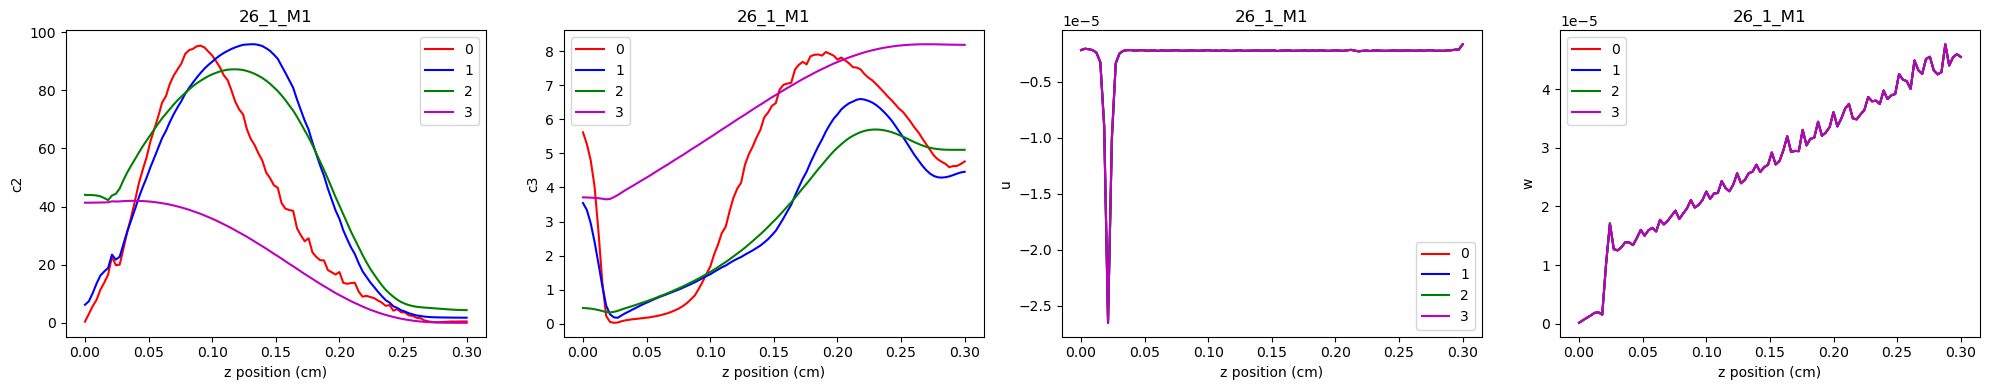

In [21]:
#mode="linear" #"linear, log"
print(Dindexlist)

for name in namerunlist: #go through all different simulations
        
#         shortname=name[-5:]
        colorlist=["r","b","g","m"]
        fig, ax = plt.subplots(1,len(varnames),figsize=(20,4)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
            
            
        hatchl=['//','\\','=','\\']
        for Dindex in Dindexlist: #go through all diffusion values
        
            colorc=colorlist[Dindex]
            runname=name+"D="+str(Dindex)
            
            #load corresponding kymograph data
            picklename=name+"_D"+str(Dindex)+'calculateddata.pickle'
            with open(os.path.join("data_kymographs",picklename), 'rb') as handle:
                data_calculated = pickle.load(handle)
        
            #prepare foldername to store plots
            foldername=os.path.join(foldername_outbase,"varaible_vs_z_different_24hav"+name+"_D"+str(Dindex))
            
            
            #select for which timepoints to plot
            
            timemin=data_calculated["time"].max()-24
            timemin_index=list(data_calculated["time"]).index(timemin)
            
            for iV in range(0,len(varnames)):
                ax[iV].set_title(name)
                ax[iV].set_ylabel(varnames[iV])
                ax[iV].set_xlabel("z position (cm)")
                
                        
                avcc=np.mean(data_calculated["kymo_radav_"+varnames[iV]][timemin_index:,:],axis=0)
                mincc=np.nanmin(data_calculated["kymo_radav_"+varnames[iV]][timemin_index:,:],axis=0)
                maxcc=np.nanmax(data_calculated["kymo_radav_"+varnames[iV]][timemin_index:,:],axis=0)
                #print(avcc.shape)
                #print(mincc.shape)
                #print(maxcc.shape)
               
                
                ax[iV].plot(data_calculated["z"],avcc,color=colorc,label=Dindex)
                #plot min and max values observed over 24h as well (too confusing
                #ax[iV].fill_between(data_calculated["z"],mincc,maxcc,alpha=0.2,color=colorc,hatch=hatchl[Dindex])
                                     
                                              
                                
        for iV in range(0,len(varnames)):
            ax[iV].legend()
                          
        fig.tight_layout(h_pad=0.1)
        

            #timefilename=str(tcount).zfill(3)+".png"

        fig.savefig(foldername+".pdf", dpi=150)
        plt.show()

# Plot kymographs etc

In [22]:
## Plot kymographs

,R,z,u,M1,D,t,r,c2,w,c3
0,0.008465,0.300000,-5.143613e-10,1,1.000000e-08,45.167,0.018492,0.033333,-4.639488e-08,5.752000
1,0.008608,0.299463,5.983030e-08,1,1.000000e-08,45.167,0.018805,0.033351,-4.572410e-08,5.751458
2,0.008751,0.298925,1.201750e-07,1,1.000000e-08,45.167,0.019118,0.033369,-4.505331e-08,5.750917
3,0.008810,0.300000,1.071767e-09,1,1.000000e-08,45.167,0.019248,0.033501,-7.195826e-08,5.759881
4,0.008954,0.299463,6.141643e-08,1,1.000000e-08,45.167,0.019561,0.033519,-7.128747e-08,5.759339
...,...,...,...,...,...,...,...,...,...,...
12870487,0.009300,0.001564,2.011128e-07,1,1.000000e-06,59.000,0.021583,52.473579,-7.132394e-09,3.174696
12870488,0.009290,0.002160,2.019478e-07,1,1.000000e-06,59.000,0.021559,52.461170,-6.905717e-09,3.175106
12870489,0.009313,0.000389,1.964932e-07,1,1.000000e-06,59.000,0.021612,52.485257,-3.387281e-09,3.174405
12870490,0.008755,0.000383,1.987895e-07,1,1.000000e-06,59.000,0.020317,52.487495,-3.399637e-09,3.174514


/var/folders/4b/8dffvbfs5qs93rh77f2zxs340000gn/T/ipykernel_17973/2097164085.py:207: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=0.1)


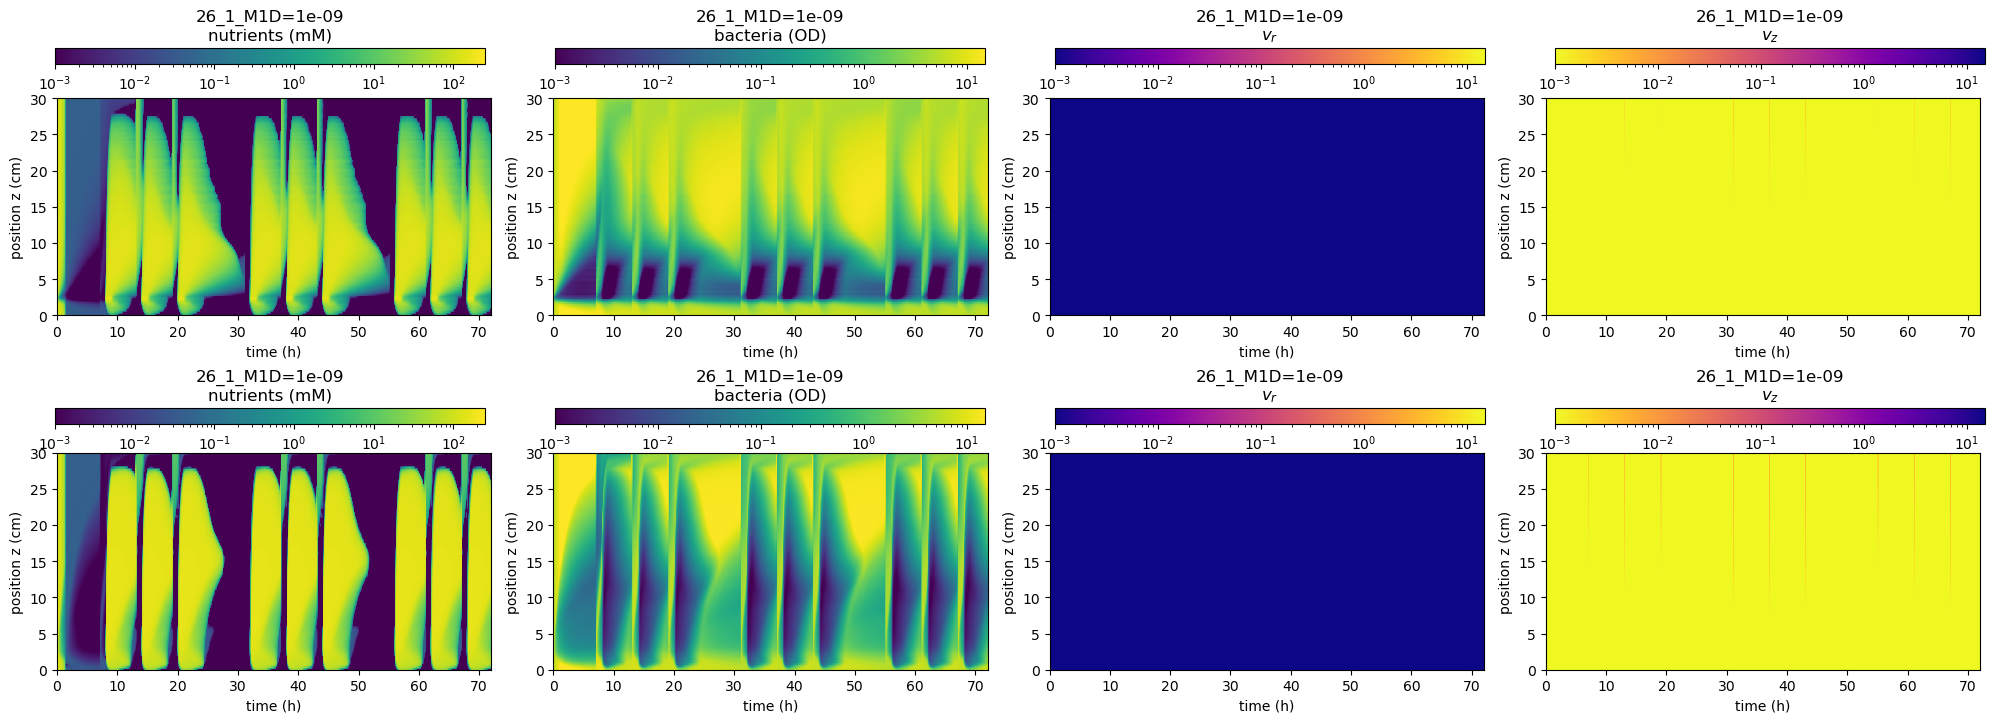

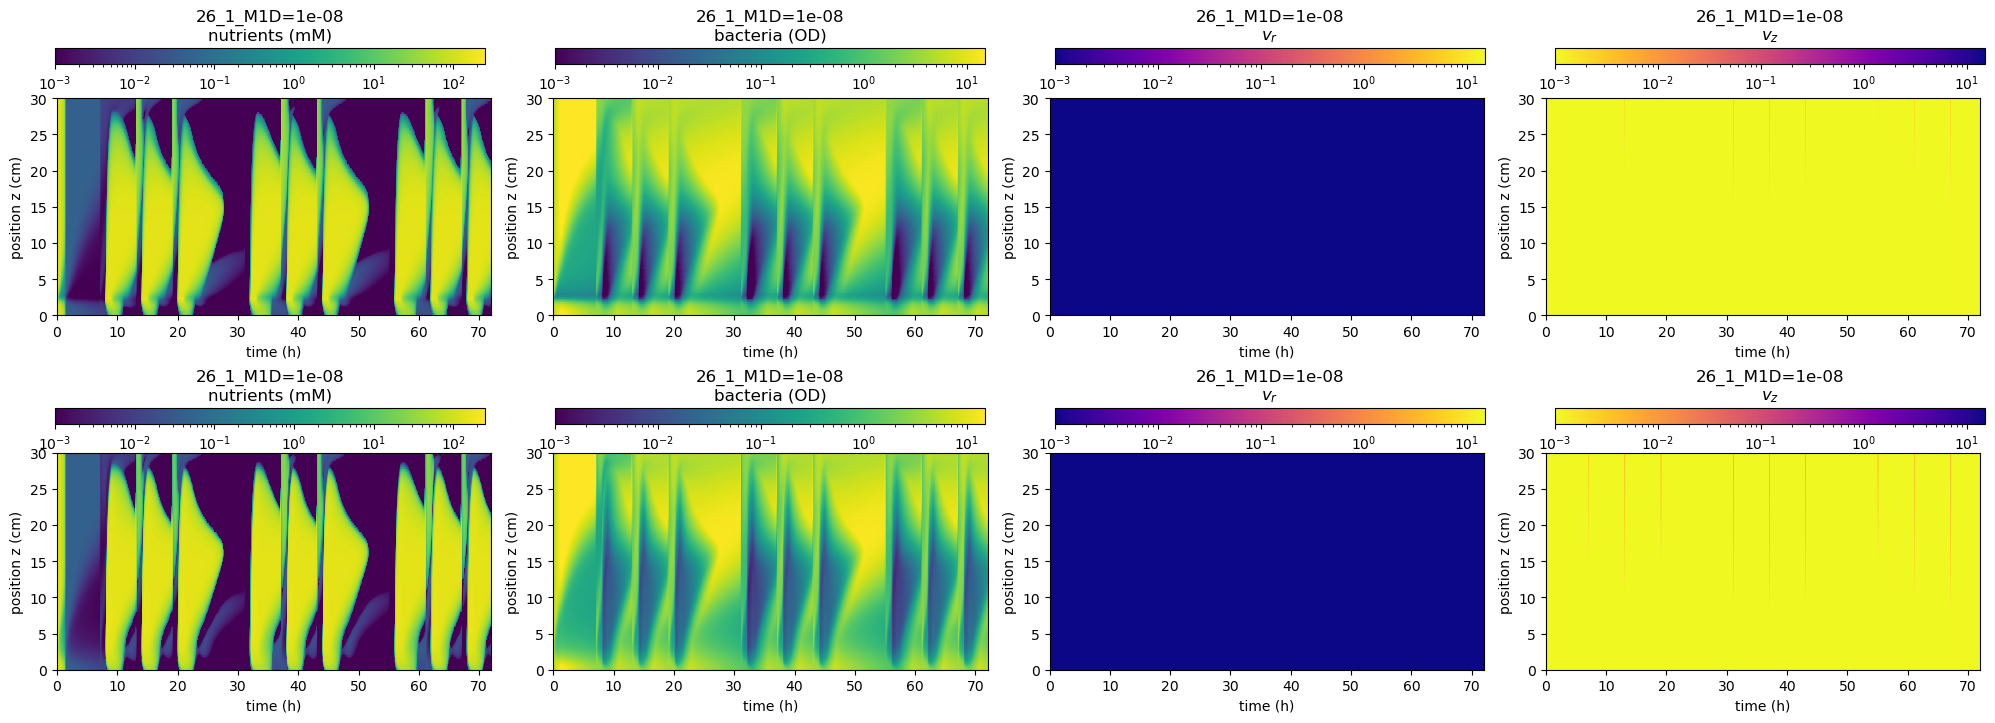

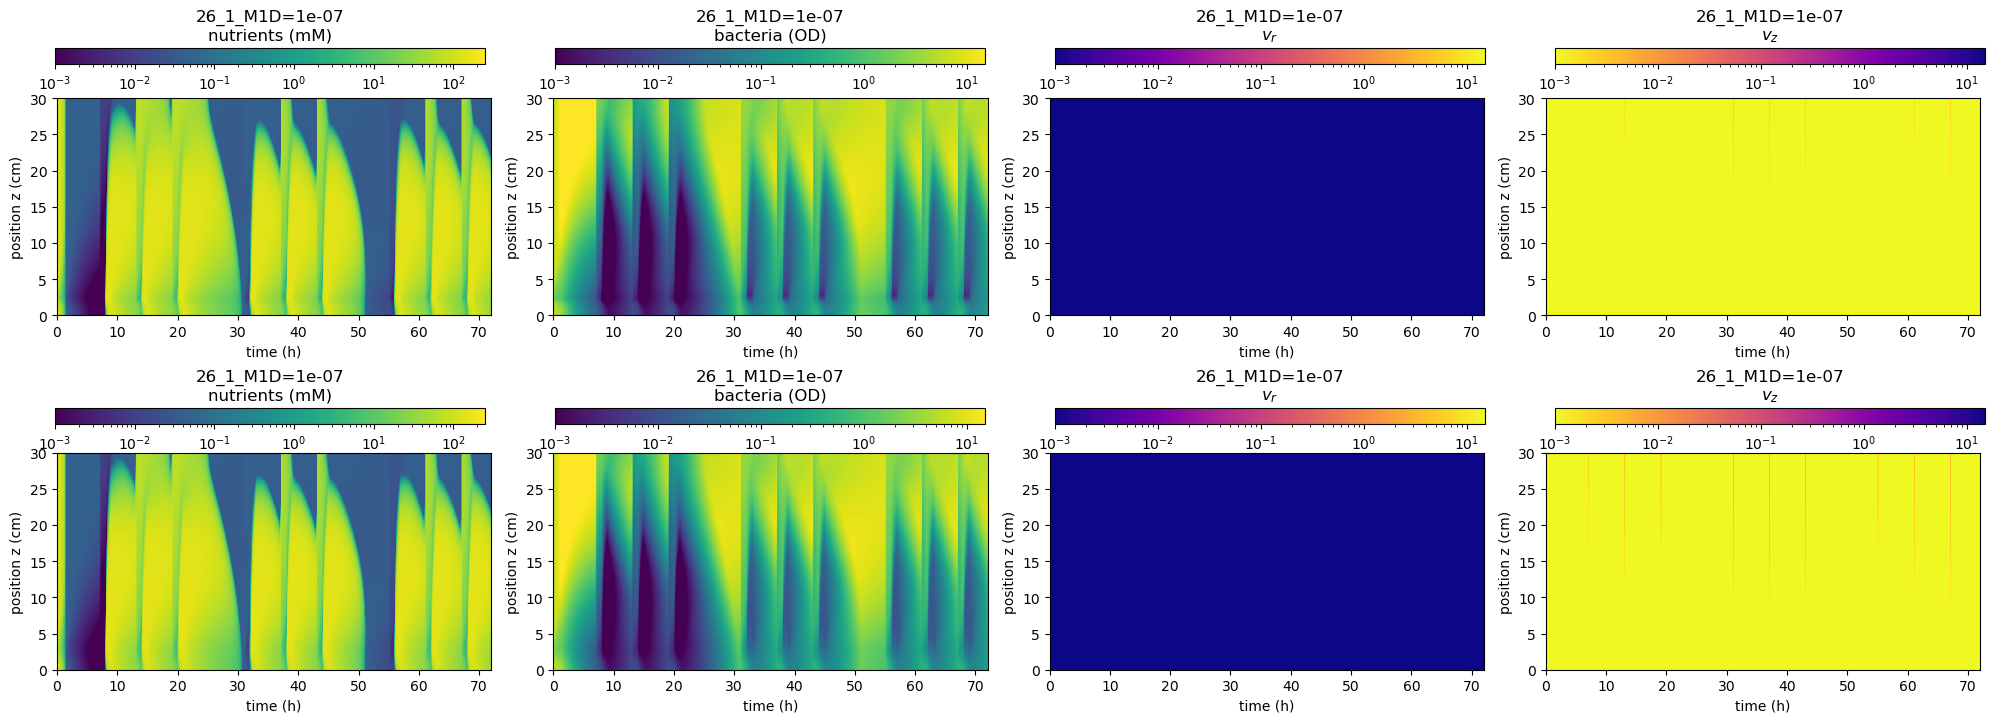

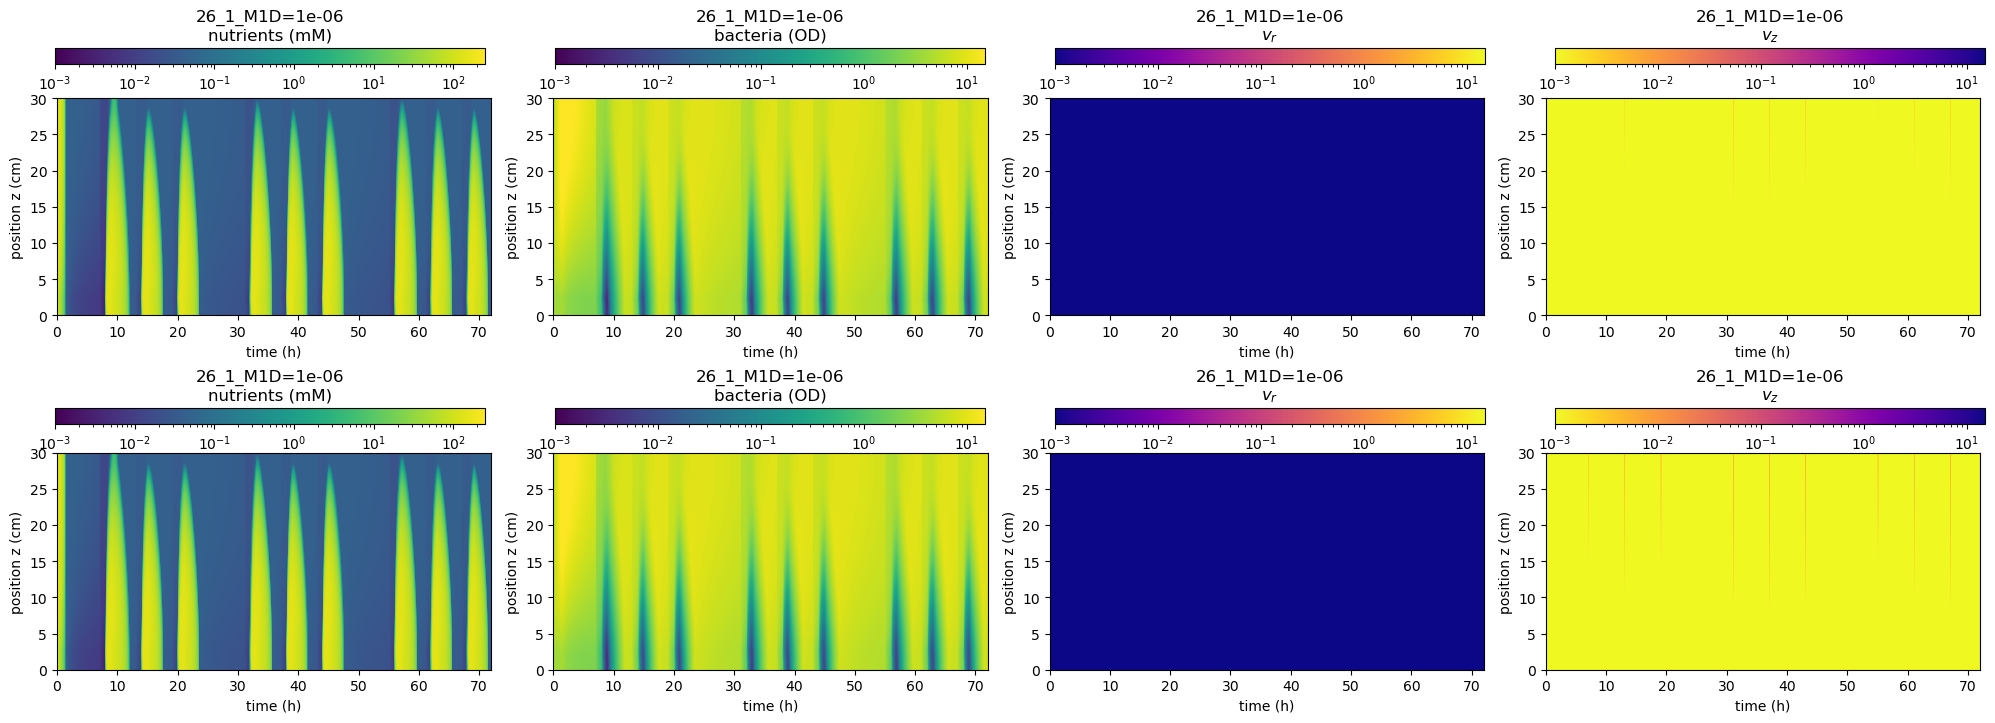

In [23]:
#mode="linear" #"linear, log"

for name in namerunlist:
    for mode in ["log"]:
        #read in file (simple format)
            
        shortname=name#name[-5:]
        data=pd.read_csv(os.path.join(foldername_data,name+".txt"))
        display(data)



        for Dindex in Dindexlist: #go through all diffusion values
            
            runname=shortname+"D="+str(D_unique[Dindex])
            
            #load corresponding kymograph data
            picklename=name+"_D"+str(Dindex)+'calculateddata.pickle'
            with open(os.path.join("data_kymographs",picklename), 'rb') as handle:
                data_calculated = pickle.load(handle)
        
            foldername=os.path.join(foldername_outbase,"kymograph_"+mode+"_"+name+"_D"+str(Dindex))
            
            


            fig, ax = plt.subplots(2,len(varnames),figsize=(20,8)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
                    #wighsize width and height
            divider=[]
            cax=[]
            cax2=[]

            #plot for every variable
            for iV in range(0,len(varnames)):
                      #choose colormap
                    #chose colormap here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                    if iV<2:
                        cmap="viridis"
                    elif iV==2:
                        cmap="plasma"
                    else:
                        cmap="plasma_r"
                        #cmap="cividis"
                     
                    ###################
                    #plot kymographs
                    if mode=="linear":
                        imK = ax[0,iV].imshow(data_calculated["kymo_radav_"+varnames[iV]], origin='lower',extent=[data_calculated["z"].min()*100, data_calculated["z"].max()*100,data_calculated["time"].min(), data_calculated["time"].max()], aspect=0.2,cmap=cmap)
                        imK2 = ax[1,iV].imshow(data_calculated["kymo_centerline_"+varnames[iV]], origin='lower',extent=[data_calculated["z"].min()*100, data_calculated["z"].max()*100,data_calculated["time"].min(), data_calculated["time"].max()], aspect=0.2,cmap=cmap)
                       
                        #else:
                        #    imK = ax[0,iV].imshow(kymograph_lists[iV], vmin=vmin, vmax=vmax, origin='lower',
                        #        extent=[z.min()*100, z.max()*100,t_unique.min(), t_unique.max()], aspect=0.2,cmap=cmap)
                        #    vmin=vmin*0.0001, vmax=vmax*0.1
                    elif mode=="log":
                        lower=0.001
                        if iV==0:
                            upper=250
                        else:
                            upper=15
                        
                        aspect=1.2
                        extent=[data_calculated["time"].min(), data_calculated["time"].max(),data_calculated["z"].min()*100, data_calculated["z"].max()*100]
                        
                        curarray=np.transpose(data_calculated["kymo_radav_"+varnames[iV]])
                        curarray[curarray <0.00001] = 0.00001
                        
                        imK = ax[0,iV].imshow(curarray, origin='lower',norm=matplotlib.colors.LogNorm(vmin=lower, vmax=upper), extent=extent, aspect=aspect,cmap=cmap)
                        curarray=np.transpose(data_calculated["kymo_centerline_"+varnames[iV]])
                        curarray[curarray <0.00001] = 0.00001
                        imK2 = ax[1,iV].imshow(curarray, origin='lower',norm=matplotlib.colors.LogNorm(vmin=lower, vmax=upper), extent=extent, aspect=aspect,cmap=cmap)
                        
                              
                    ax[0,iV].set_xlabel("time (h)")
                    ax[0,iV].set_ylabel("position z (cm)")
                    ax[1,iV].set_xlabel("time (h)")
                    ax[1,iV].set_ylabel("position z (cm)")
                    #ax[0,iV].axhline(t_cur,ls='--',color='w')
                    ####################

                    
                    #add colorbar
                    width = 0.215
                    height = 0.02
                    vertical_position = 0.9
                    horizontal_position = 0.25*iV+0.03
                    
                    #divider = make_axes_locatable(ax[0,iV])
                    #cax.append(divider.append_axes('right', size='60%', pad=0.1))
                    #cax.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                    cax.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                    cb2 = fig.colorbar(imK, cax=cax[-1], orientation="horizontal")
                    cax[-1].set_title(runname+'\n'+varnames_long[iV])
                    
                    vertical_position = 0.45
                    #divider2 = make_axes_locatable(ax[0,iV])
                    #cax2.append(divider2.append_axes('right', size='60%', pad=0.1))
                    cax2.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                    #cax.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                    cb22 = fig.colorbar(imK2, cax=cax2[-1], orientation="horizontal")
                   
                    cax2[-1].set_title(runname+'\n'+varnames_long[iV])
                    
                      #fig.colorbar(im, ax=ax[1,iV])
                #fig.tight_layout()
            plt.tight_layout(h_pad=0.1)
            #timefilename=str(tcount).zfill(3)+".png"

            fig.savefig(foldername+".pdf", dpi=150)
            plt.show()

# Plot snapshots

,R,z,u,M1,D,t,r,c2,w,c3
0,0.008465,0.300000,-5.143613e-10,1,1.000000e-08,45.167,0.018492,0.033333,-4.639488e-08,5.752000
1,0.008608,0.299463,5.983030e-08,1,1.000000e-08,45.167,0.018805,0.033351,-4.572410e-08,5.751458
2,0.008751,0.298925,1.201750e-07,1,1.000000e-08,45.167,0.019118,0.033369,-4.505331e-08,5.750917
3,0.008810,0.300000,1.071767e-09,1,1.000000e-08,45.167,0.019248,0.033501,-7.195826e-08,5.759881
4,0.008954,0.299463,6.141643e-08,1,1.000000e-08,45.167,0.019561,0.033519,-7.128747e-08,5.759339
...,...,...,...,...,...,...,...,...,...,...
12870487,0.009300,0.001564,2.011128e-07,1,1.000000e-06,59.000,0.021583,52.473579,-7.132394e-09,3.174696
12870488,0.009290,0.002160,2.019478e-07,1,1.000000e-06,59.000,0.021559,52.461170,-6.905717e-09,3.175106
12870489,0.009313,0.000389,1.964932e-07,1,1.000000e-06,59.000,0.021612,52.485257,-3.387281e-09,3.174405
12870490,0.008755,0.000383,1.987895e-07,1,1.000000e-06,59.000,0.020317,52.487495,-3.399637e-09,3.174514


[ 0.       0.16667  0.33333  0.5      0.66667  0.83333  1.       1.1667
  1.3333   1.5      1.6667   1.8333   2.       2.1667   2.3333   2.5
  2.6667   2.8333   3.       3.1667   3.3333   3.5      3.6667   3.8333
  4.       4.1667   4.3333   4.5      4.6667   4.8333   5.       5.1667
  5.3333   5.5      5.6667   5.8333   6.       6.1667   6.3333   6.5
  6.6667   6.8333   7.       7.1667   7.3333   7.5      7.6667   7.8333
  8.       8.1667   8.3333   8.5      8.6667   8.8333   9.       9.1667
  9.3333   9.5      9.6667   9.8333  10.      10.167   10.333   10.5
 10.667   10.833   11.      11.167   11.333   11.5     11.667   11.833
 12.      12.167   12.333   12.5     12.667   12.833   13.      13.167
 13.333   13.5     13.667   13.833   14.      14.167   14.333   14.5
 14.667   14.833   15.      15.167   15.333   15.5     15.667   15.833
 16.      16.167   16.333   16.5     16.667   16.833   17.      17.167
 17.333   17.5     17.667   17.833   18.      18.167   18.333   18.5
 18.667   1

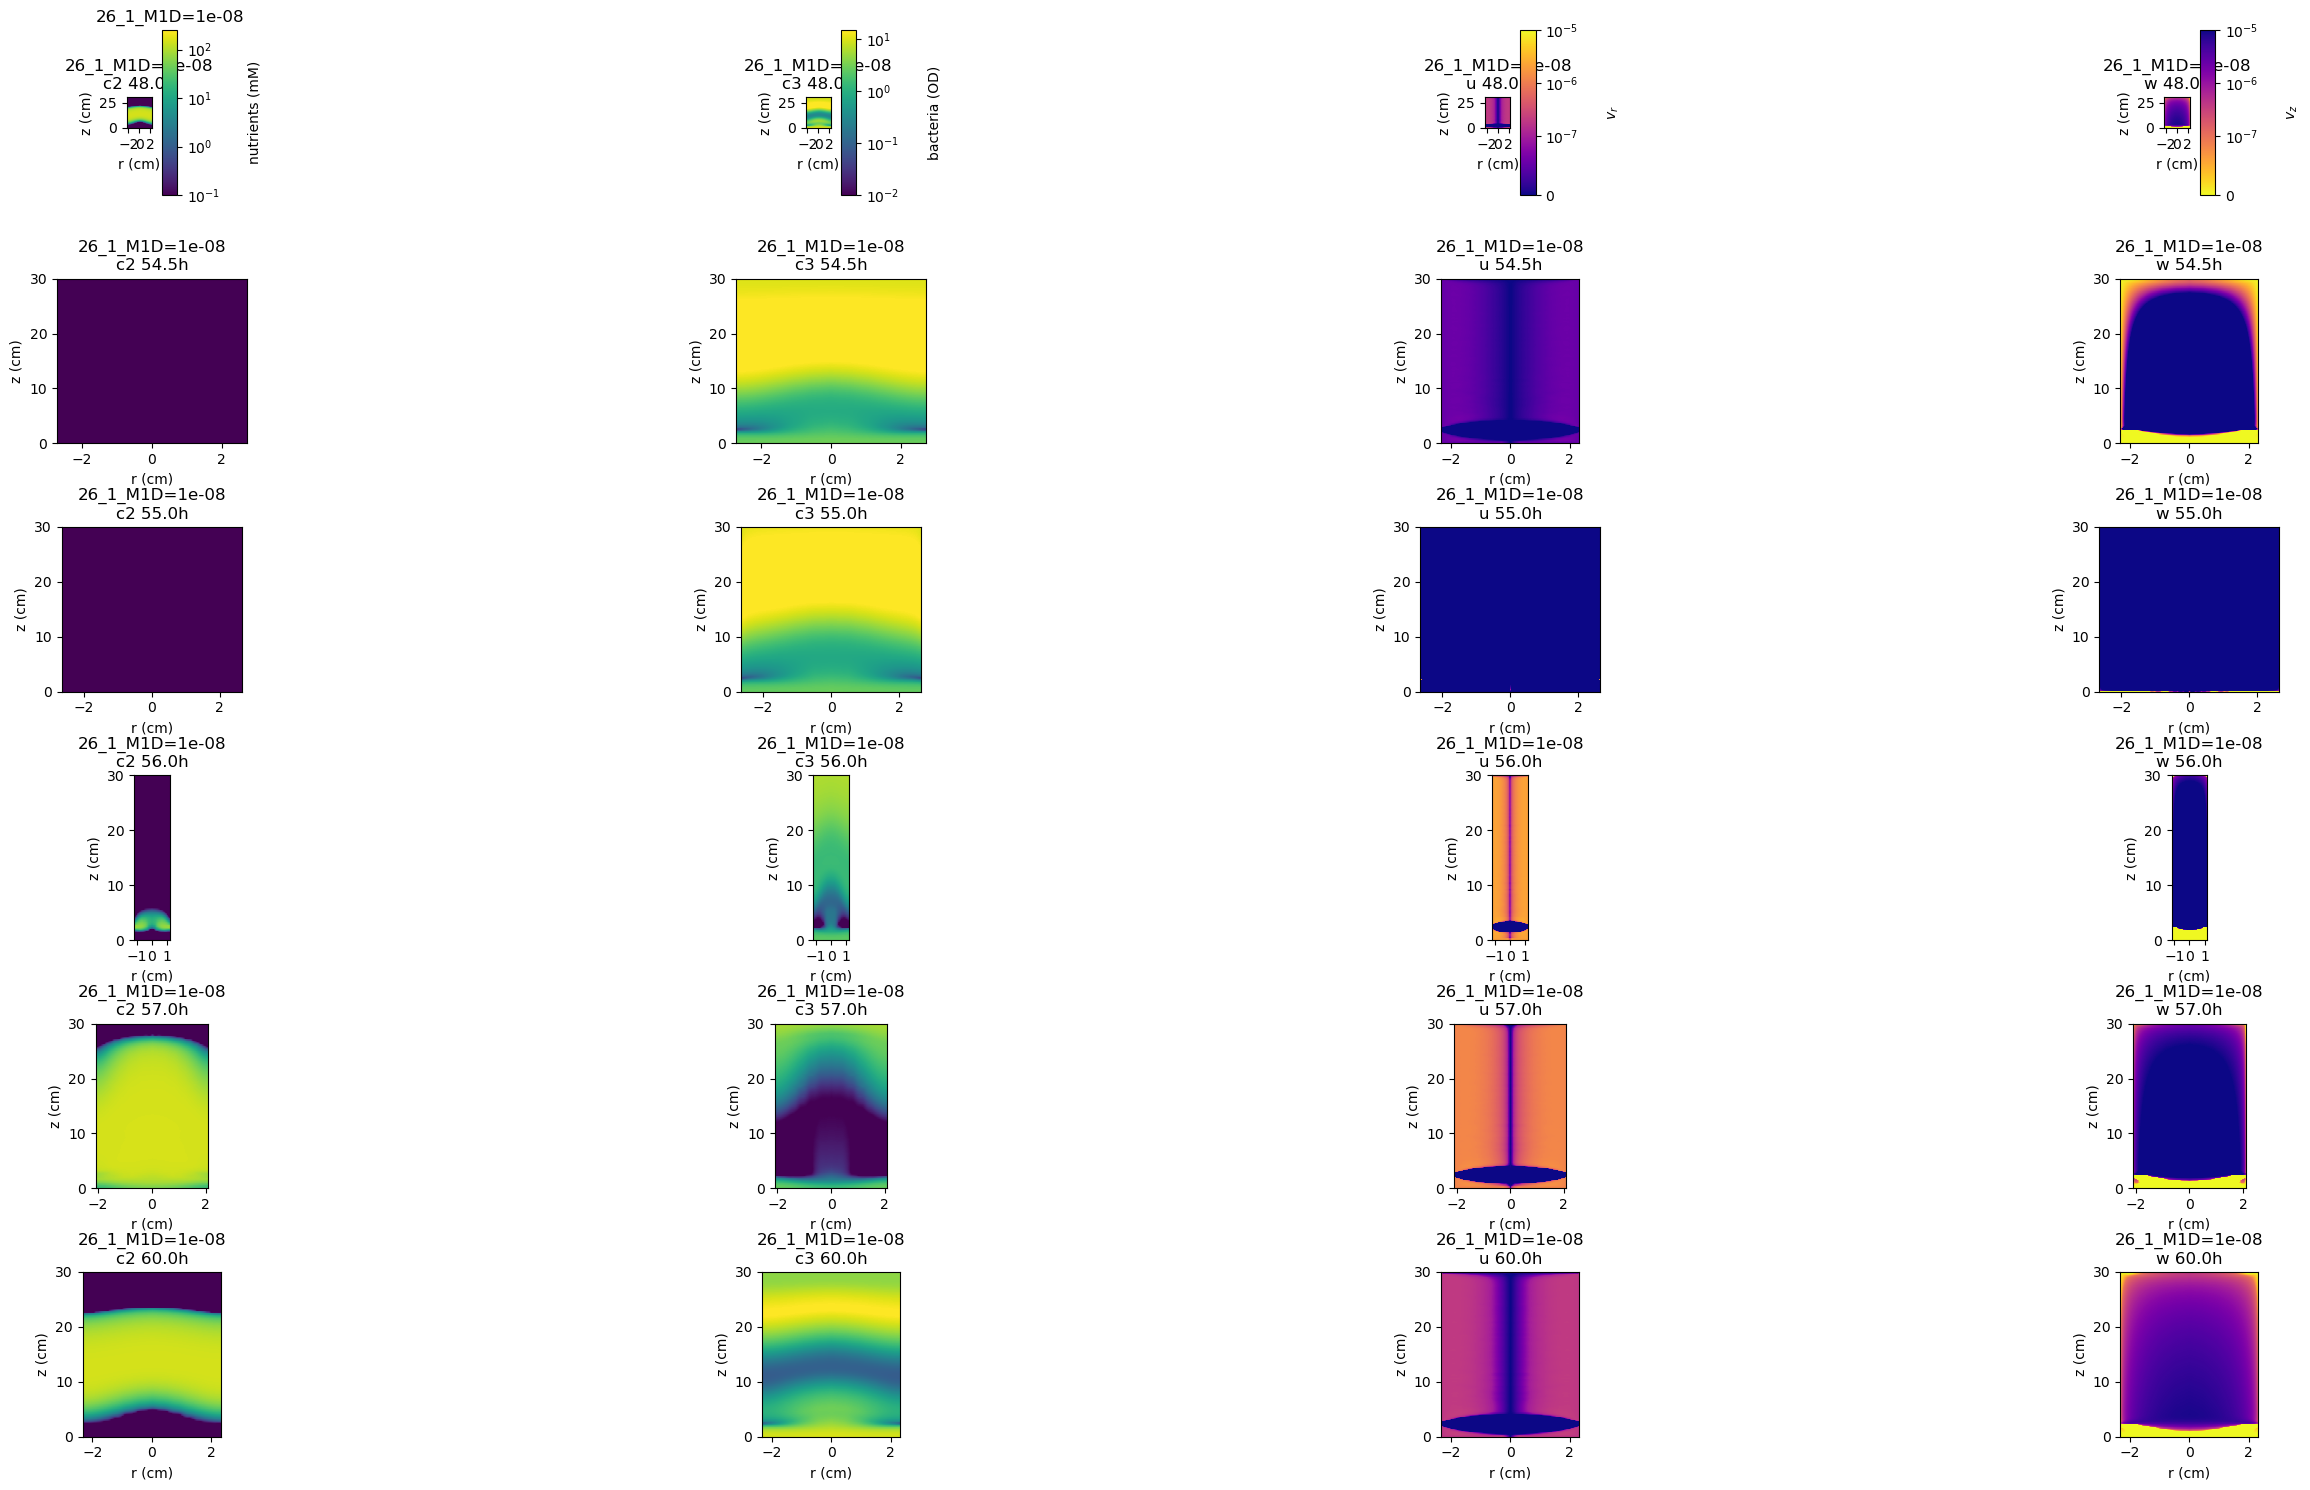

In [28]:
det=48
timepoints=[0+det,6.5+det,7+det,8+det,9+det,12+det] #set timepoints to plot

#namerunlist=["26_5_"]#,"29_3"]
Dindexlist=[1]
for name in namerunlist: #go through all different simulations
        
        shortname=name#name[-5:]
        data=pd.read_csv(os.path.join(foldername_data,name+".txt"))
        display(data)

        #get unique values:
        t_unique=data["t"].unique()
        t_unique.sort()
        print(t_unique)
        
        D_unique=data["D"].unique()
        D_unique.sort()
        
        #find closes timepoints for which data is available
        tc=-1
        for t in timepoints:
            tc=tc+1
            idx = (np.abs(t_unique - t)).argmin()
            timepoints[tc]=t_unique[idx]
            print(t_unique[idx])
        print(timepoints)
      
        for Dindex in Dindexlist: #go through all diffusion values
            #decide which parameter to use (u)
            
            select=data.loc[(data["D"]==D_unique[Dindex])]
            runname=shortname+"D="+str(D_unique[Dindex])
            #which variables to plot
            
            #prepare foldername to store plots
            foldername=os.path.join(foldername_outbase,"snapshots_"+name+"_D"+str(Dindex))
        
            #prepare plot
            fig, ax = plt.subplots(len(timepoints),len(varnames),figsize=(30,15)) # its for the plots: 1 row and 3 panels in 1 row (figure size in cm)
            cax=[]
        
            tcount = -1
            for t_cur in timepoints: #t_unique[-1]
                tcount=tcount+1
                select2=select.loc[ (select["t"]==t_cur)]
                
                ##############################
                #interpolote for 2d plot: Set up a regular grid of interpolation points
                #############################

                r=select2["r"].values #get coordinates as array
                z=select2["z"].values #get coordinates as array
                
                zi, ri = np.linspace(z.min(), z.max(), 100),np.linspace(r.min(), r.max(), 120) #prepare grid for interpolation
                zi, ri = np.meshgrid(zi, ri) #prepare grid for interpolation

                #prepare lists to store results
                var_list_interpolated=[]#interpolated grid
                var_list_interpolated2=[] #mirror along r=0
                var_list_min=[] #min and max values (to adjust plotting range)
                var_list_max=[] #min and max values (to adjust plotting range
                var_list=[] 

                for iV in range(0,len(varnames)):
                    
                    ax[tcount,iV].set_ylabel("z (cm)")
                    ax[tcount,iV].set_xlabel("r (cm)")
                    ax[tcount,iV].set_title(runname+"\n"+varnames[iV]+" "+str(t_cur)+"h")
                    
                    var=varnames[iV]
                    var_list.append(select2[var].values)
                    var_list_min.append(var_list[-1].min())
                    var_list_max.append(var_list[-1].max())
                    #interpolate. Use resacling to get it to work, see https://stackoverflow.com/questions/17577587/matplotlib-2d-graph-with-interpolation
                    var_rescaled = (var_list[-1] - var_list[-1].min()) / var_list[-1].ptp()
                    rbf = scipy.interpolate.Rbf(z, r,var_rescaled , function='linear')
                    var_rescaled=rbf(zi,ri)
                    var_list_interpolated.append(var_list[-1].ptp()*var_rescaled + var_list[-1].min())
                    #mirror data along r=0:
                    mirroredcur=np.append(var_list_interpolated[-1][::-1,:],var_list_interpolated[-1],axis=0)
                    #flit x and y axis
                    var_list_interpolated2.append(np.transpose(mirroredcur)) #
                    
                      
                for iV in range(0,len(varnames)):
                    #choose colormap
                    #chose colormap here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                    if iV<2:
                        cmap="viridis"
                    elif iV==2:
                        cmap="plasma"
                    else:
                        cmap="plasma_r"
                        #cmap="cividis"
                    
                    #set range with current min and max values
                    #vmin=var_list_min[iV]
                    #vmax=var_list_max[iV]
                    
                    #set range manually
                    vmin=0
                    vmaxlistmanual=[180,15,np.power(10.,-5.),np.power(10.,-5.)] #for nutrients, OD, etc
                    vmax=vmaxlistmanual[iV]
                    extent = [-1 * r.max() * 100, r.max() * 100, z.min() * 100, z.max() * 100]

                    #extent=[z.min()*100, z.max()*100,-1*r.max()*1000, r.max()*1000]
                    aspect = .3/(0.35*r.max()*100)
                    aspect = .15 / (0.35 * r.max() * 100) #for wider plot smaller value
                    #if no_massflow:
                    #            aspect=.3 / (0.35 * r.max() * 100) / 4.5
                    
                    
                    mode="log"
                    if mode=="linear":
                              pass  
                    #extent [z.min()*100, z.max()*100,-1*r.max()*1000, r.max()*1000]
                    elif mode=="log":
                        if iV==0: #nutrients
                            lower=0.1
                            upper=250
                            curarray=var_list_interpolated2[iV]
                            curarray[curarray <lower] = lower
                            im = ax[tcount,iV].imshow(curarray, norm=matplotlib.colors.LogNorm(vmin=lower, vmax=upper), origin='lower',
                                 extent=extent, aspect =aspect,cmap=cmap)
                        elif iV==1: #bacteria
                            lower=0.01
                            upper=15
                            curarray=var_list_interpolated2[iV]/0.5
                            curarray[curarray <lower] = lower
                            print("bacteria")
                            print(np.max(curarray))
                            print(np.mean(curarray))

                            im = ax[tcount,iV].imshow(curarray, norm=matplotlib.colors.LogNorm(vmin=lower, vmax=upper), origin='lower',
                                extent=extent, aspect = aspect,cmap=cmap)
                        else: #velocities
                            
                             im = ax[1,iV].imshow(var_list_interpolated2[iV], vmin=vmin*0.0001, vmax=vmax*0.1, origin='lower',
                                extent=extent, aspect = aspect,cmap=cmap)
                             #or try SymLogNorm
                             im = ax[tcount,iV].imshow(var_list_interpolated2[iV], norm=matplotlib.colors.SymLogNorm(vmax*0.01,vmin=vmin, vmax=vmax), origin='lower',
                                extent=extent, aspect = aspect,cmap=cmap)
                            
                    
                    
                    # #Give the colorbar its own axis to avoid resizing the parent axis:
                    #add color bars
                    if tcount==0:
                        height = 0.215
                        width = 0.02
                        vertical_position = 0.24*iV+0.03
                        horizontal_position = 0.9
                        
                        from mpl_toolkits.axes_grid1 import make_axes_locatable

                        divider = make_axes_locatable(ax[tcount,iV])
                        cax.append(divider.append_axes('right', size='60%', pad=0.1))
                        #cax.append(plt.axes([horizontal_position, vertical_position, width, height])) #the new axis for first colorbar
                        cb2 = fig.colorbar(im, cax=cax[-1], orientation="vertical")
                        
                        
                        # #print
                        if iV==0:
                             cax[-1].set_title(runname)
                                
                        cax[-1].set_label(varnames_long[iV])
                        #cax[-1].set_xticks([])
                        cax[-1].minorticks_off()
                        
                        cax[-1].set_ylabel(varnames_long[iV], rotation=90, labelpad=20)


            fig.tight_layout(h_pad=0.1)
            #timefilename=str(tcount).zfill(3)+".png"

            fig.savefig(foldername+".pdf", dpi=150)
            plt.show()
            
            
            
            
            